# Домашнее задание по курсу анализа данных # 2
Версия от 14.11.2021

Всего 50 баллов = 50 основных + 10 дополнительных

**Оценка**  = (Количество баллов за работу*2 + 20)/10

**Мягкий дедлайн: 06.12.2021  23:59**

**Жесткий дедлайн: 11.12.2021  23:59**

Присылать решение ссылкой на ваш **github** в телеграмм **@Aleron75** или на почту **milenkin.aa@phystech.edu**

**Автор:** Миленькин Александр

# Парсим рейтинг преподавателей с Вики-Физтех

<div class="alert alert-info">
    
Итак, перед вами **VIKI-MIPT** - сборник отзывов о кафедрах и преподавателях МФТИ: ` http://wikimipt.org/wiki/ `

Эта кладезь отзывов не раз давала студентам оценить психологический портрет потенциальных экзаменаторов и преподавателей. 
    
    
<img src="../lessons/images/wiki_mipt_front.PNG" height="300" width="1300"> 



# Описание задачи: 

**Задача** - собрать данные по всем текущим преподавателям всех `институтских кафедр` МФТИ.

Собранный датасет должен представлять из себя `.csv` файл со следующими полями:

* `full_name` - ФИО преподавателя
*  `teach_place` - Кафедра
*  `degree`- Ученая Степень
* `knowledge` - Знания
*  `teaching_skill` - Умение преподавать	
* `commication_skill` - В общении	
* `easy_exam` - «Халявность»	
* `overall_score` - Общая оценка

<img src="../lessons/images/wiki_mipt_info.PNG" height="300" width="300"> 

**Комментарий:** - Знание, умение преподавать, в общение, "Халявность" и Общая оценка можно найти странице каждого преподавателя. 

<div class="alert alert-warning">
    
Финальный балл складывается из трех частей:

* Cобранный датасет (выложить архивом на гитхаб)
* python кода, которым был собран датасет (выложить на гитхаб)
* Окуратный и понятный код с комментариями
    
    
**Дополнительные + 10 баллов можно получить за кластеризацию преподавателей, используя только оценки из собранных данных**

# Возможный алгоритм обхода для сбора данных:

In [ ]:
# 0 - Открываем с помощью Selenium клавную страницу вики-Физтех- http://wikimipt.org/wiki/   
# 1 - Получаем список кафедр с главной страницу вики-Физтех    
# Обходя список кафедр, "проваливаемся" в каждую страницу кафедру кликом по названию кафедры
#     2 - Получаем список преподавателей
#         Обходя список преподавателей "Проваливаемся" на страницу преподавателя по ФИО преподавателя
#             3 - Получаем табличку данных с характеристмиками преподавателями и прочу необходимую информацию. 
#             Записываем в pandas dataframe
# Сохраняем данные в .csv файл

Установим и импортируем необходимые библиотеки

In [ ]:
!pip install selenium

  Using cached urllib3-1.26.7-py2.py3-none-any.whl (138 kB)
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.25.11
    Uninstalling urllib3-1.25.11:
      Successfully uninstalled urllib3-1.25.11
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.7 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
!pip install webdriver-manager

  Using cached urllib3-1.25.11-py2.py3-none-any.whl (127 kB)
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.26.7
    Uninstalling urllib3-1.26.7:
      Successfully uninstalled urllib3-1.26.7
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
selenium 4.1.0 requires urllib3[secure]~=1.26, but you have urllib3 1.25.11 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
!pip install --upgrade ChromeDriver

In [ ]:
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:3 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:4 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:5 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Get:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:12 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:13 http://ppa.launchpad.net/graph

In [ ]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.common.exceptions import NoSuchElementException
from selenium.webdriver.common.by import By
from webdriver_manager.chrome import ChromeDriverManager

In [32]:
import time
import pandas as pd
import numpy as np
from tqdm import tqdm

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

Открываем с помощью Selenium клавную страницу вики-Физтех- http://wikimipt.org/wiki/   

In [ ]:
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')

driver = webdriver.Chrome('chromedriver', options=options)

url = 'http://wikimipt.org/wiki/'
driver.get(url)

Заходим на сайт со списком кафедр, кликнув на соответствующую ссылку

In [ ]:
departments_url = driver.find_elements(By.LINK_TEXT, 'Кафедры')[0]
departments_url.click()

Получаем список ссылок на кафедры с главной страницы вики-Физтех и сохраням их в массив departments_urls

In [ ]:
departments_urls = []

for href in driver.find_elements(By.CLASS_NAME, 'mw-category-group'):
  for elements in href.find_elements(By.TAG_NAME, 'a'):
    departments_urls.append(elements.get_property('href'))

In [ ]:
departments_urls

['http://wikimipt.org/wiki/%D0%92%D0%BE%D0%B5%D0%BD%D0%BD%D0%B0%D1%8F_%D0%BA%D0%B0%D1%84%D0%B5%D0%B4%D1%80%D0%B0',
 'http://wikimipt.org/wiki/%D0%92%D1%8B%D1%81%D1%88%D0%B0%D1%8F_%D1%88%D0%BA%D0%BE%D0%BB%D0%B0_%D1%81%D0%B8%D1%81%D1%82%D0%B5%D0%BC%D0%BD%D0%BE%D0%B3%D0%BE_%D0%B8%D0%BD%D0%B6%D0%B8%D0%BD%D0%B8%D1%80%D0%B8%D0%BD%D0%B3%D0%B0',
 'http://wikimipt.org/wiki/%D0%94%D0%B5%D0%BF%D0%B0%D1%80%D1%82%D0%B0%D0%BC%D0%B5%D0%BD%D1%82_%D0%BC%D0%BE%D0%BB%D0%B5%D0%BA%D1%83%D0%BB%D1%8F%D1%80%D0%BD%D0%BE%D0%B9_%D0%B8_%D0%B1%D0%B8%D0%BE%D0%BB%D0%BE%D0%B3%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%BE%D0%B9_%D1%84%D0%B8%D0%B7%D0%B8%D0%BA%D0%B8',
 'http://wikimipt.org/wiki/%D0%9A%D0%B0%D1%84%D0%B5%D0%B4%D1%80%D0%B0_%C2%AB%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC%D1%8B_%D0%B8_%D1%82%D0%B5%D1%85%D0%BD%D0%BE%D0%BB%D0%BE%D0%B3%D0%B8%D0%B8_%D0%BF%D1%80%D0%BE%D0%B3%D1%80%D0%B0%D0%BC%D0%BC%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D1%8F%C2%BB',
 'http://wikimipt.org/wiki/%D0%9A%D0%B0%D1%84%D0%B5%D0%B4%D1%80%

Обходя список кафедр, заходим в каждую страницу кафедр и получаем список преподавателей

In [ ]:
teachers_urls = []

for department_url in departments_urls:
    driver.get(department_url) # Зашли на страницу с названием кафедры
    
    for teacher_href in driver.find_elements(By.CLASS_NAME, 'gallerytext'):
      for elements in teacher_href.find_elements(By.TAG_NAME, 'a'):
        teachers_urls.append(elements.get_property('href'))

In [ ]:
teachers_urls

['http://wikimipt.org/wiki/%D0%98%D0%B2%D0%B0%D0%BD%D0%BE%D0%B2_%D0%AE%D1%80%D0%B8%D0%B9_%D0%93%D1%80%D0%B8%D0%B3%D0%BE%D1%80%D1%8C%D0%B5%D0%B2%D0%B8%D1%87',
 'http://wikimipt.org/wiki/%D0%9A%D0%B2%D0%B0%D1%87%D0%B5%D0%BD%D0%BA%D0%BE_%D0%90%D0%BD%D0%B4%D1%80%D0%B5%D0%B9_%D0%92%D0%BB%D0%B0%D0%B4%D0%B8%D0%BC%D0%B8%D1%80%D0%BE%D0%B2%D0%B8%D1%87',
 'http://wikimipt.org/wiki/%D0%9A%D0%BE%D1%80%D0%BD%D0%B5%D0%B5%D0%B2_%D0%92%D0%B8%D0%BA%D1%82%D0%BE%D1%80_%D0%90%D0%BB%D0%B5%D0%BA%D1%81%D0%B0%D0%BD%D0%B4%D1%80%D0%BE%D0%B2%D0%B8%D1%87',
 'http://wikimipt.org/wiki/%D0%9B%D0%B5%D1%82%D1%83%D0%BD%D0%BE%D0%B2%D1%81%D0%BA%D0%B8%D0%B9_%D0%A1%D0%B5%D1%80%D0%B3%D0%B5%D0%B9_%D0%92%D0%BB%D0%B0%D0%B4%D0%B8%D0%BC%D0%B8%D1%80%D0%BE%D0%B2%D0%B8%D1%87',
 'http://wikimipt.org/wiki/%D0%9F%D0%B5%D1%88%D0%B5%D0%B2_%D0%90%D0%BD%D0%B4%D1%80%D0%B5%D0%B9_%D0%9B%D0%B5%D0%BE%D0%BD%D0%B8%D0%B4%D0%BE%D0%B2%D0%B8%D1%87',
 'http://wikimipt.org/wiki/%D0%A1%D0%B5%D0%B4%D0%BE%D0%B2_%D0%91%D0%BE%D1%80%D0%B8%D1%81_%D0%A1%D0%B5%

Обходя список ссылок на преподавателей, заходим на их страницы и получаем таблицу данных с характеристиками преподавателя.

In [ ]:
def parse(score):
    if score == None or type(score) != str or score == '':
        return None

    if score == '( нет голосов )':
        return 1.0
        
    return float(score[0:score.find(' ')])

In [ ]:
teachers = []

for teacher_url in teachers_urls: 
  driver.get(teacher_url) # Заходим на страницу с преподавателем

  # ФИО преподавателя
  full_name = driver.find_element(By.ID, 'firstHeading').text

  try:
      # Таблица с основной информацией
      table = driver.find_element(By.ID, "mw-content-text").find_element(By.TAG_NAME, 'table')      
      rows = table.find_elements(By.TAG_NAME, 'tr') 

      # Кафедра
      teach_place = None

      # Ученая степень 
      degree = None

      # Знания
      knowledge = None

      # Умение преподавать
      teaching_skill = None

      # В общении
      commication_skill = None

      # «Халявность»
      easy_exam = None

      # Общая оценка
      overall_score = None

      for row in rows[2:]:
          try:
              head = row.find_element(By.TAG_NAME, 'th').text 

              if head == 'Альма-матер':
                  teach_place = row.find_element(By.TAG_NAME, 'td').text

              elif head == 'Учёная степень':
                  degree = row.find_element(By.TAG_NAME, 'td').text
              
          except NoSuchElementException:
              try:
                  # Таблица с оценками
                  table_2 = row.find_element(By.TAG_NAME, 'table')
                  for rows in table_2.find_elements(By.TAG_NAME, 'tr'):
                      r = rows.find_element(By.TAG_NAME, 'td').text

                      if r == 'Знания':
                          knowledge = rows.find_element(By.CLASS_NAME, 'starrating-avg').text
                          knowledge = parse(knowledge)

                      elif r == 'Умение преподавать':
                          teaching_skill = rows.find_element(By.CLASS_NAME, 'starrating-avg').text
                          teaching_skill = parse(teaching_skill)

                      elif r == 'В общении':
                          communication_skill = rows.find_element(By.CLASS_NAME, 'starrating-avg').text
                          communication_skill = parse(communication_skill)

                      elif r == '«Халявность»':
                          easy_exam = rows.find_element(By.CLASS_NAME, 'starrating-avg').text
                          easy_exam = parse(easy_exam)

                      elif r == 'Общая оценка':
                          overall_score = rows.find_element(By.CLASS_NAME, 'starrating-avg').text
                          overall_score = parse(overall_score)
              
              except NoSuchElementException:
                  break
      
      teachers.append([full_name, teach_place, degree, knowledge, teaching_skill, communication_skill, easy_exam, overall_score])
  except NoSuchElementException:
      print('There is no data found for this teacher')

There is no data found for this teacher


 Записываем эту таблицу в pandas dataframe

In [24]:
df = pd.DataFrame(teachers, columns=['full_name', 'teach_place', 'degree', 'knowledge', 'teaching_skill', 'communication_skill', 'easy_exam', 'overall_score'], dtype=str)
df.shape

(779, 8)

In [25]:
df

full_name  ... overall_score
0                Иванов Юрий Григорьевич  ...           5.0
1           Кваченко Андрей Владимирович  ...           3.5
2           Корнеев Виктор Александрович  ...           5.0
3        Летуновский Сергей Владимирович  ...           3.0
4                Пешев Андрей Леонидович  ...           1.0
..                                   ...  ...           ...
774            Петров Алексей Алексеевич  ...           1.0
775                Семёнов Юрий Иванович  ...           1.0
776  Скворчевский Константин Анатольевич  ...          4.33
777           Котина Светлана Васильевна  ...           1.0
778         Хельвас Александр Валерьевич  ...           3.0

[779 rows x 8 columns]

Сохраняем данные в .csv файл

In [26]:
df.to_csv('df.csv')

Совершим кластеризацию преподавателей, используя только оценки из собранных данных

In [27]:
X_train = df[['knowledge', 'teaching_skill', 'communication_skill', 'easy_exam', 'overall_score']]

Выбросим NaNы

In [28]:
X_train = X_train.dropna()

In [29]:
X_train.head()

knowledge teaching_skill communication_skill easy_exam overall_score
0       5.0            5.0                 5.0       5.0           5.0
1       3.5            3.0                 2.5       3.5           3.5
2       5.0            5.0                 5.0       4.0           5.0
3       3.0            3.0                 3.0       2.0           3.0
4       1.0            1.0                 1.0       1.0           1.0

Переведем данные во float тип

In [30]:
X_train['knowledge'] = X_train['knowledge'].map(lambda x: float(x))
X_train['teaching_skill'] = X_train['teaching_skill'].map(lambda x: float(x))
X_train['communication_skill'] = X_train['communication_skill'].map(lambda x: float(x))
X_train['easy_exam'] = X_train['easy_exam'].map(lambda x: float(x))
X_train['overall_score'] = X_train['overall_score'].map(lambda x: float(x))

In [33]:
X_train = X_train.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

Снизим размерность с помощью PCA

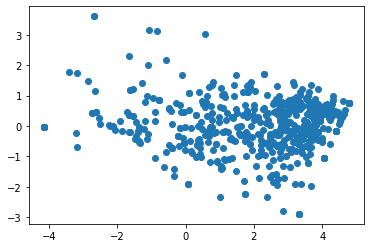

In [34]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train)

X_pca = X_train_pca[:, 0]
Y_pca = X_train_pca[:, 1]

plt.scatter(X_pca, Y_pca)

Используем метод кластеризации KMeans

In [35]:
clf = KMeans(n_clusters=2, max_iter=1000)

labels = clf.fit_predict(X_train)

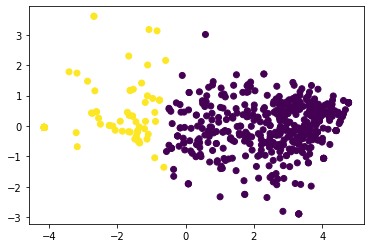

In [36]:
plt.scatter(X_pca, Y_pca, c = labels)

# Вспомогательные элементы для майнинга данных

* Библиотека `Selenium`: https://selenium-python.readthedocs.io/

Полезные методы и рекомендации:
    
* `element = browser.find_elements_by_*что угодно*()` # Поиск элемента на странице
* `element.click()` # Кликнуть по элементу (провалится по ссылке / расскрыть банер)
* `browser.back()` # Вернуться назад 
* `pd.read_html()` # Способ загрузить таблицку из html сразу в Pandas
* Спрашивать в чате или гуглить